Honey Production Linear Regression Assignment

In [1]:
#load libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
# Read csv file of Honey Production data set.
df_Honey=pd.read_csv("Honeyproduction data.csv", delimiter=";")
df_Honey

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


Data set containing some information as below:
1. State: It is showing state name where honey production is done.
2. totalprod:- This coloumn is showing the total production of the honey in with respect to state.
3. stocks: This coloumn is showing stocks availble in the state.
4. priceperlb: price of the every lb in the state.
5. prodvalue: total production values of the honey in respect to the state.
6. year: It showing year of the production with respect to the state.

In [3]:
# Year wise analysis
df_Honey.year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012], dtype=int64)

In [4]:
prod_per_year = df_Honey.groupby('year').totalprod.mean().reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


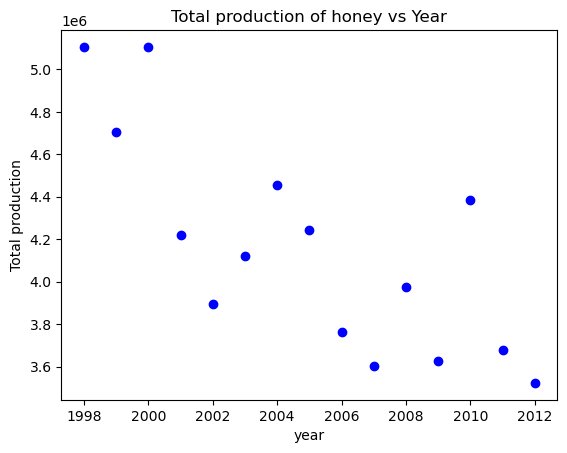

In [5]:
# Analysis of the current given year with the total production of honey.

X = prod_per_year["year"]
X = X.values.reshape(-1,1)
y = prod_per_year["totalprod"]

# plot 
plt.xlabel("year")
plt.ylabel("Total production")
plt.title("Total production of honey vs Year")
plt.scatter(X, y, color = "b", label = "original")
plt.show()

As per the graph, it is showing the basically linear regression from 1998 to 2012 and total production of the honey decrease.

slope of the line:  -88303.18915238194
intercept of the line:  181208083.1073298


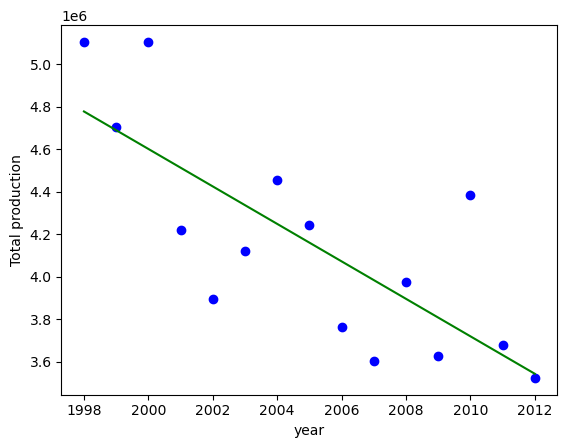

In [6]:
# create the linear regression model
regr = linear_model.LinearRegression()

# fit the data
regr.fit(X, y)

print("slope of the line: ",regr.coef_[0])
print("intercept of the line: ",regr.intercept_)

# prediction
y_predict = regr.predict(X)

#plot the prediction
plt.xlabel("year")
plt.ylabel("Total production")
plt.scatter(X, y, color = "b",)
plt.plot(X, y_predict, color = "g",)
plt.show()

linearly decrease total production year by year from year 1998 to 2012 by 5.0 x 10e6 to 3.6 x 10e6. 

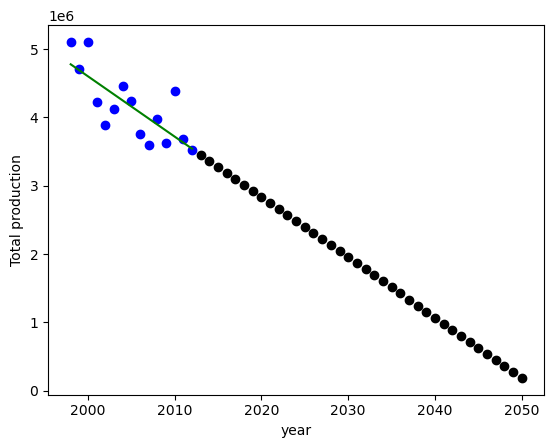

In [7]:
X_future = np.array(range(2013,2051))
X_future = X_future.reshape(-1,1)

# predict the future total production
future_predict = regr.predict(X_future)

# plot the prediction
plt.xlabel("year")
plt.ylabel("Total production")
plt.scatter(X, y, color = "b", label = "original")
plt.plot(X, y_predict, color = "g", label = "fit")
plt.scatter(X_future, future_predict, color = "k", label = "prediction")
plt.show()

In [8]:
# prediction Value in 2050 of the total production

print(X_future[-1], future_predict[-1])

[2050] 186545.34494683146


Total production is decline by year on year and by 2050 its value might be 186545.34 

In [9]:
# state wise analysis from 1998 to 2012.
df_Honey.state.unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
       'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'SC'],
      dtype=object)

In [10]:
prod_per_state = df_Honey.groupby('state').totalprod.mean().reset_index()
prod_per_state=prod_per_state.sort_values(by='totalprod', ascending=False)
prod_per_state.head(10)

,state,totalprod
23,ND,3.167233e+07
3,CA,2.316900e+07
34,SD,1.774273e+07
5,FL,1.646987e+07
21,MT,1.043747e+07
18,MN,9.624000e+06
36,TX,6.993600e+06
41,WI,5.455533e+06
17,MI,4.854667e+06
9,ID,4.410667e+06


This table is showing top 10 state honey producer from 1998 to 2012 and its total production value.